# Uploading the data

## Importing libraries and dataset

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.model_selection import RandomizedSearchCV #  hyperparameter tuning
#from sklearn.linear_model import LinearRegression # linear regression
from sklearn.linear_model import LogisticRegression # logistic regression
#from sklearn.linear_model import Lasso # Lasso for regression
from sklearn.linear_model import ARDRegression # ARDRegression for regression
#from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.neighbors import KNeighborsClassifier # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# for classification trees
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
ap_chef = pd.read_excel(io=file)


# LARGEST_ORDER_SIZE is incorrectly labelled and should be AVERAGE_MEALS_PER_CUST
ap_chef = ap_chef.rename(columns={'LARGEST_ORDER_SIZE' : 'AVERAGE_MEALS_PER_CUST'})

# PC_LOGINS in misleading - actually represents TOTAL_LOGINS
ap_chef = ap_chef.rename(columns={'PC_LOGINS' : 'TOTAL_LOGINS'})

## Exploring the dependent variable

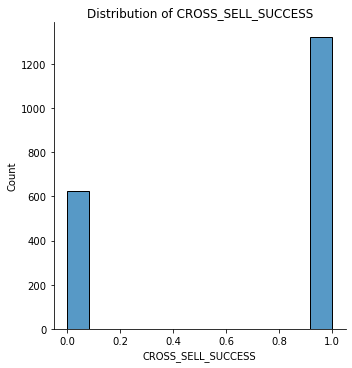


While there are twice as many customers who opted fort he promotion relative to 
those who did not, we can confirm that we have sufficient observations in both
categories to continue with the analysis.


In [2]:
# Generating plot for CROSS_SELL_SUCCESS
sns.displot(x    = 'CROSS_SELL_SUCCESS',
            data = ap_chef)
plt.title('Distribution of CROSS_SELL_SUCCESS')
plt.show()


# ANALYSIS
print ("""
While there are twice as many customers who opted fort he promotion relative to 
those who did not, we can confirm that we have sufficient observations in both
categories to continue with the analysis.""")

## Exploring the dependent variables

### Classifying variables by type

In [3]:
# Organizing data based on type
    # Continuous
continuous = ['REVENUE',
              'TOTAL_MEALS_ORDERED',
              'AVG_TIME_PER_SITE_VISIT',
              'WEEKLY_PLAN',
              'AVG_PREP_VID_TIME',
              'TOTAL_PHOTOS_VIEWED']
   
    # Interval
interval = ['PRODUCT_CATEGORIES_VIEWED',
            'UNIQUE_MEALS_PURCH',
            'CONTACTS_W_CUSTOMER_SERVICE',
            'CANCELLATIONS_BEFORE_NOON',
            'CANCELLATIONS_AFTER_NOON',
            'MOBILE_LOGINS',
            'TOTAL_LOGINS',
            'EARLY_DELIVERIES',
            'LATE_DELIVERIES',
            'AVG_CLICKS_PER_VISIT',
            'AVERAGE_MEALS_PER_CUST',
            'MASTER_CLASSES_ATTENDED',
            'MEDIAN_MEAL_RATING']

    # Binary
binary = ['MOBILE_NUMBER',
          'PACKAGE_LOCKER',
          'REFRIGERATED_LOCKER',
          'TASTES_AND_PREFERENCES']
        
    # Categorical
categorical = ['NAME',
                'EMAIL',
                'FIRST_NAME',
                'FAMILY_NAME']

### Exploring the continuous variables

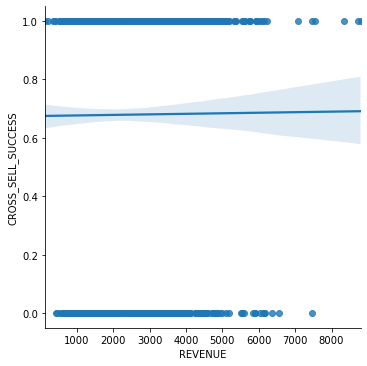

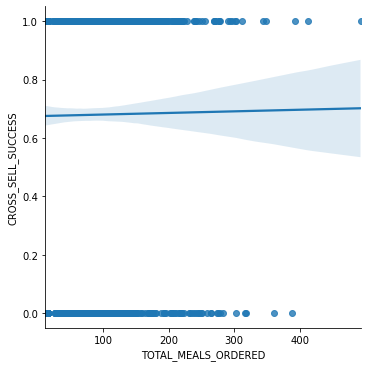

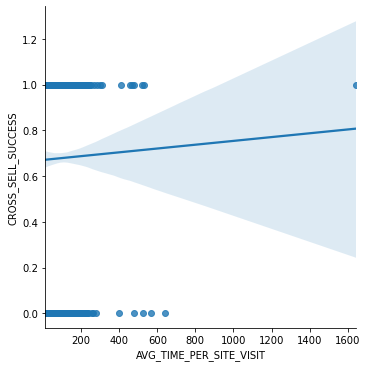

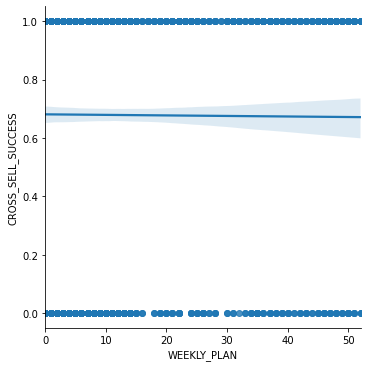

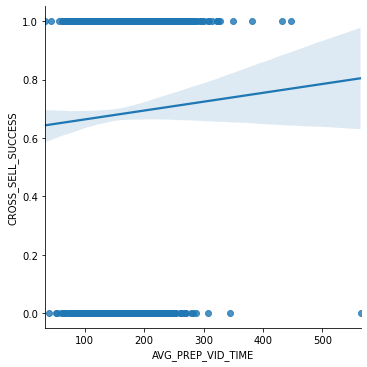

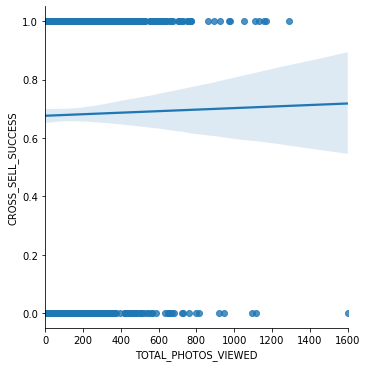

In [4]:
# loop to generate plots
for var in continuous:
    sns.lmplot(x    = var,
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')
    plt.show()

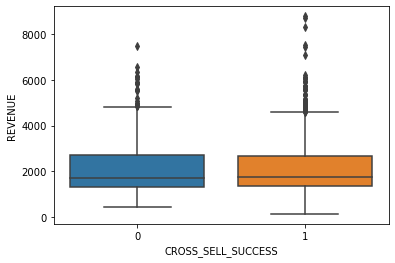

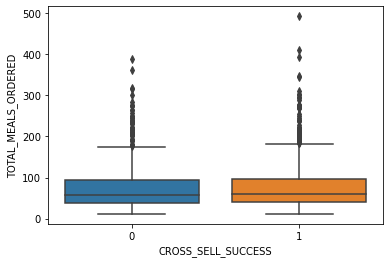

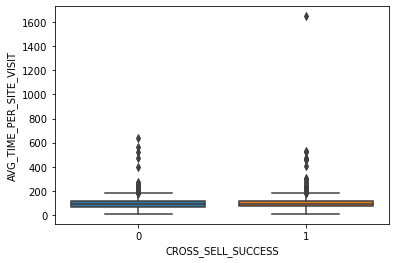

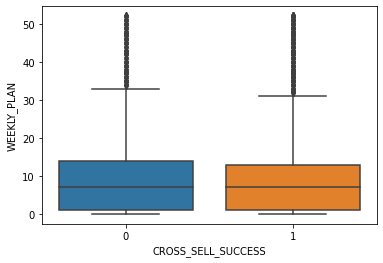

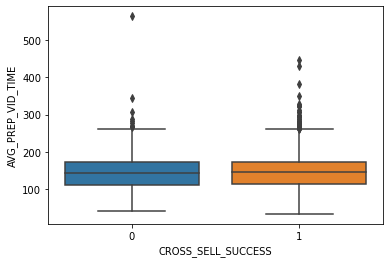

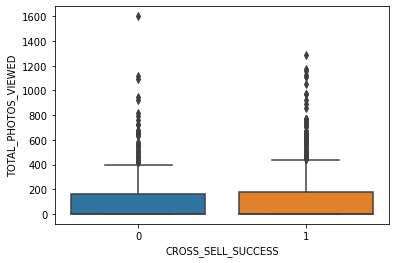

In [5]:
# loop to generate plots
for var in continuous:
    sns.boxplot(x    = 'CROSS_SELL_SUCCESS',
                y    = var,
                data = ap_chef)
    plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
    plt.ylabel(ylabel = var)
    plt.show()

In [6]:
# ANALYSIS
print("""
Judging from lmplots:
While no clear relationship stands out, we can see that the data where cross
selling was successfull always stretches slighly more than where it wasn't.
We will build dummy variables with a cut-off at the mean and median to explore
whether this has any significance.

Judging from boxplots:
Medians all appear to be at around the same level, and distribution appears to
be relatively similar as well, with the exception of a few outliers here and
there.""")


Judging from lmplots:
While no clear relationship stands out, we can see that the data where cross
selling was successfull always stretches slighly more than where it wasn't.
We will build dummy variables with a cut-off at the mean and median to explore
whether this has any significance.

Judging from boxplots:
Medians all appear to be at around the same level, and distribution appears to
be relatively similar as well, with the exception of a few outliers here and
there.


### Exploring the interval variables

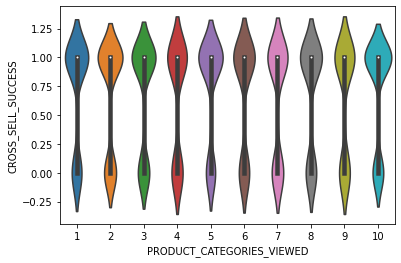

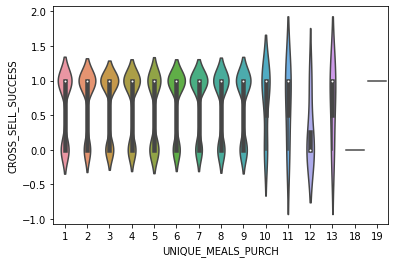

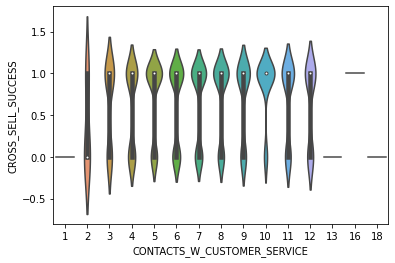

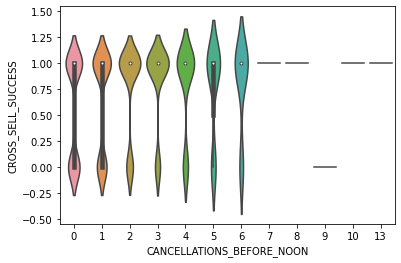

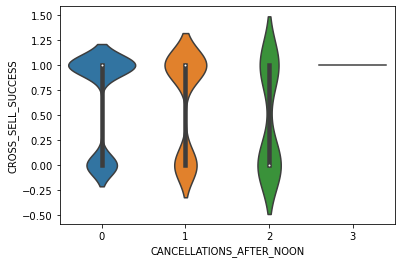

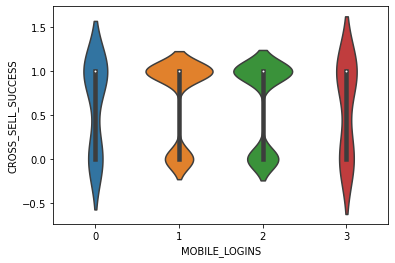

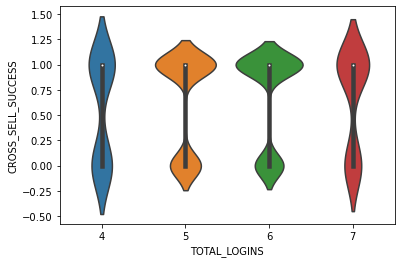

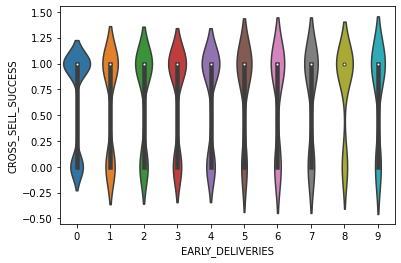

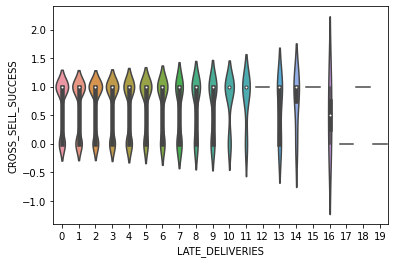

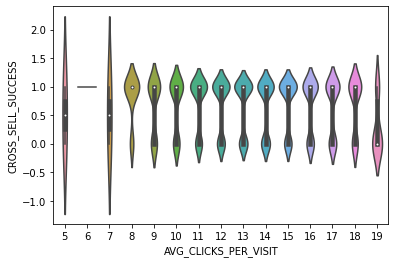

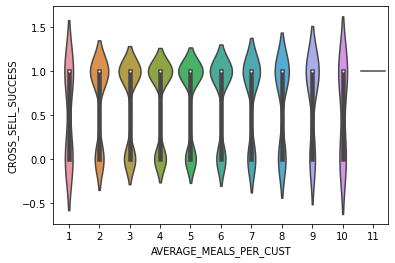

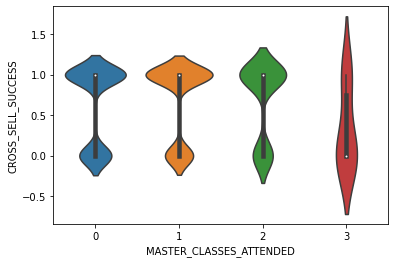

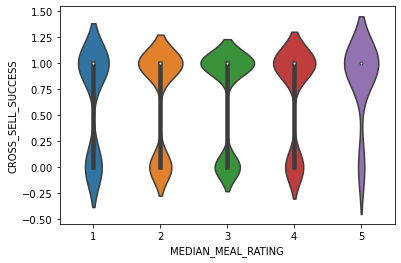

In [7]:
# creating scatterplots of interval variables to view any correlations

# loop to generate plots
for var in interval:
    sns.violinplot(x    = var,
                   y    ='CROSS_SELL_SUCCESS',
                   data = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')
    plt.show()

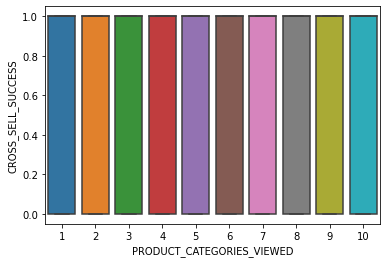

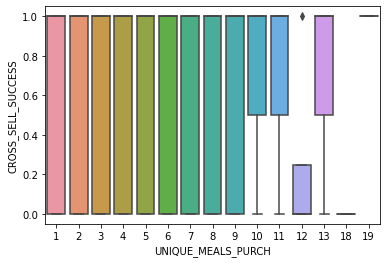

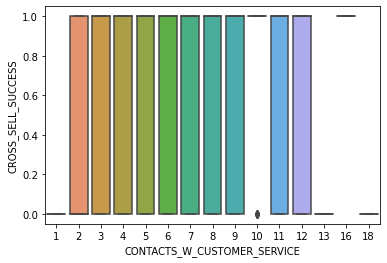

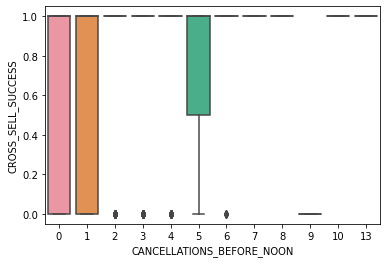

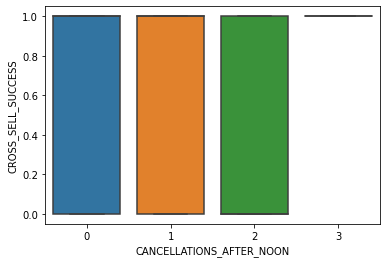

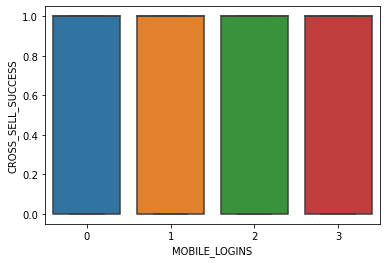

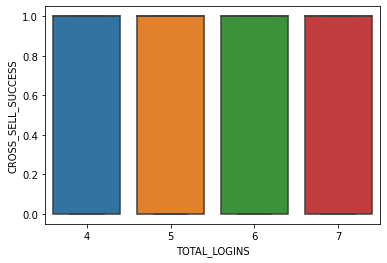

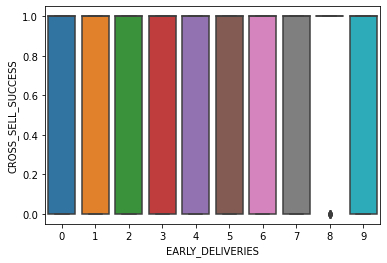

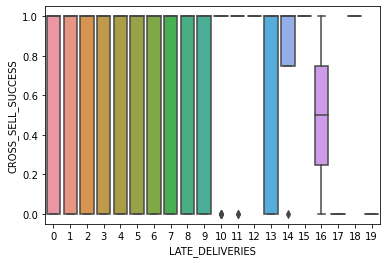

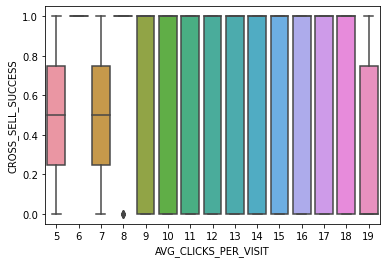

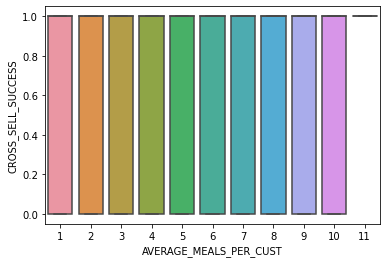

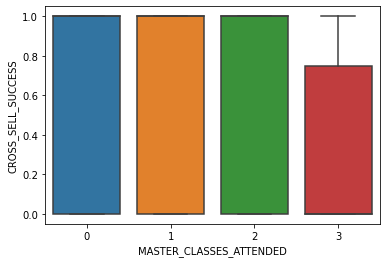

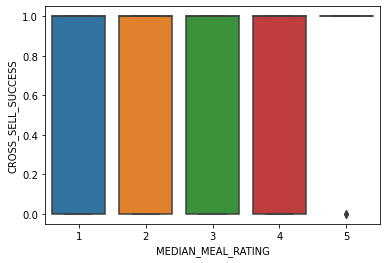

In [8]:
# creating boxplots of interval variables to view any correlations

# loop to generate plots
for var in interval:
    sns.boxplot(x    = var,
               y    ='CROSS_SELL_SUCCESS',
               data = ap_chef)
    plt.xlabel(xlabel = var)
    plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')
    plt.show()

In [9]:
# ANALYSIS
print("""
UNIQUE_MEALS_PURCH: observations >9 appear to be significantly more likely
to have also opted for the promotion. There are however too few observations
>9 to make a binary variable out of it.

CANCELLATIONS_BEFORE_NOON: customers who have cancelled before noon on more than
2 occasions almost always opted to buy the promotion. A binary variable will be
created to highlight this split.

CANCELLATIONS_AFTER_NOON: all customers who cancelled after noon more than 2 times
bought into the promotion. However too few customers belong to that category for
us to use it to draw conclusions. Customers who never cancelled appear to more
often buy into the promotion than not.

MOBILE_LOGINS: clear negative slope to the trendline. Does never logging in
online increase chances of adopting the promotion? Perhaps the promotion is 
better visuaized on a PC?

LATE_DELIVERIES: observations >9 more often buy into the promotion. Too small a
sample to separate into it's own class though.

AVG_CLICKS_PER_VISIT: observations <9 appear to take advantage of the promotion
more often than not. However, this represents only 33 observations.
""")


UNIQUE_MEALS_PURCH: observations >9 appear to be significantly more likely
to have also opted for the promotion. There are however too few observations
>9 to make a binary variable out of it.

CANCELLATIONS_BEFORE_NOON: customers who have cancelled before noon on more than
2 occasions almost always opted to buy the promotion. A binary variable will be
created to highlight this split.

CANCELLATIONS_AFTER_NOON: all customers who cancelled after noon more than 2 times
bought into the promotion. However too few customers belong to that category for
us to use it to draw conclusions. Customers who never cancelled appear to more
often buy into the promotion than not.

MOBILE_LOGINS: clear negative slope to the trendline. Does never logging in
online increase chances of adopting the promotion? Perhaps the promotion is 
better visuaized on a PC?

LATE_DELIVERIES: observations >9 more often buy into the promotion. Too small a
sample to separate into it's own class though.

AVG_CLICKS_PER_VISIT

### Exploring the binary variables

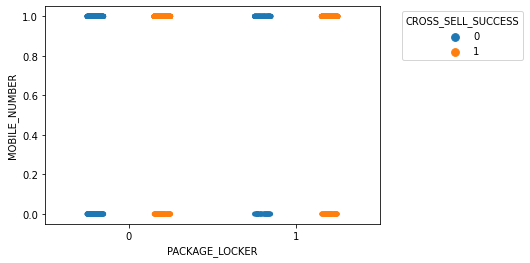

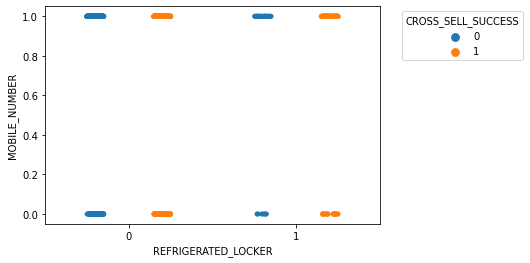

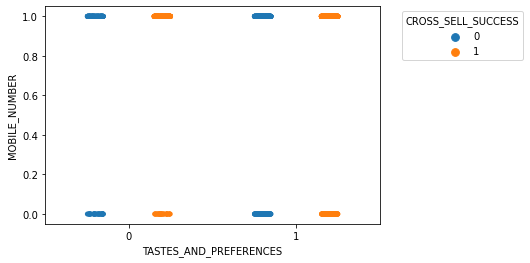

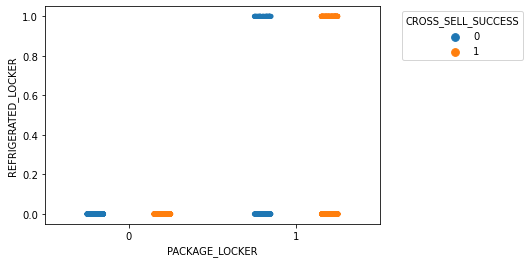

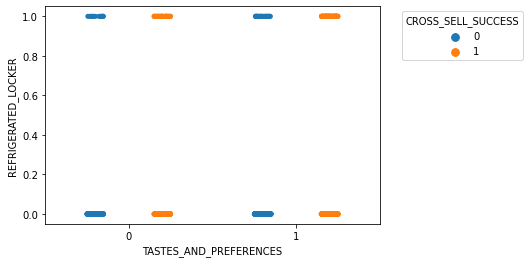


It is hard to be sure from a visual test alone but it would appear that certain
combinations (eg. MOBILE_NUMBER and PACKAGE_LOCKER) have higher concentrations
of cross-selling success than others.

Combination variables will therefore be created and their impact observed


In [10]:
# creating a copy of binary for the below loop
lst = binary.copy()

# creating a loop to visualize binary variables
for var in lst:
    
    for var2 in lst:
        
        # skip if both variables are the same
        if var == var2:
            continue
        
        # create plot otherwise
        else :
            sns.stripplot(x     = var2,
                          y     = var,
                          hue   = 'CROSS_SELL_SUCCESS',
                          dodge = True,
                          data  = ap_chef)
            plt.legend(title='CROSS_SELL_SUCCESS', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.show()
            
    lst.remove(var)
    
# ANALYSIS
print("""
It is hard to be sure from a visual test alone but it would appear that certain
combinations (eg. MOBILE_NUMBER and PACKAGE_LOCKER) have higher concentrations
of cross-selling success than others.

Combination variables will therefore be created and their impact observed""")

# Engineering variables

## Variables from earlier visual analysis

### Mean split of continuous variables

In [11]:
# Creating dummy variables
ap_chef['REVENUE_m']                 = 0
ap_chef['TOTAL_MEALS_ORDERED_m']     = 0
ap_chef['AVG_TIME_PER_SITE_VISIT_m'] = 0
ap_chef['AVG_PREP_VID_TIME_m']       = 0
ap_chef['TOTAL_PHOTOS_VIEWED_m']     = 0


# iterating over original column to change values in the new feature column
for index, value in ap_chef.iterrows():

    if ap_chef.loc[index, 'REVENUE'] > ap_chef['REVENUE'].median():
        ap_chef.loc[index, 'REVENUE_m'] = 1
    
    if ap_chef.loc[index, 'TOTAL_MEALS_ORDERED'] > ap_chef['TOTAL_MEALS_ORDERED'].median():
        ap_chef.loc[index, 'TOTAL_MEALS_ORDERED_m'] = 1
        
    if ap_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > ap_chef['AVG_TIME_PER_SITE_VISIT'].median():
        ap_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT_m'] = 1

    if ap_chef.loc[index, 'AVG_PREP_VID_TIME'] > ap_chef['AVG_PREP_VID_TIME'].median():
        ap_chef.loc[index, 'AVG_PREP_VID_TIME_m'] = 1
        
    if ap_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > ap_chef['TOTAL_PHOTOS_VIEWED'].median():
        ap_chef.loc[index, 'TOTAL_PHOTOS_VIEWED_m'] = 1
        

## Exploring correlation with new variables

# generating the correlation data
ap_chef_corr = ap_chef.corr(method = 'pearson').round(decimals = 2)

# checking the correlations for the interval variables
print (ap_chef_corr.loc['CROSS_SELL_SUCCESS', ['REVENUE_m', 'TOTAL_MEALS_ORDERED_m',
       'AVG_TIME_PER_SITE_VISIT_m', 'AVG_PREP_VID_TIME_m', 'TOTAL_PHOTOS_VIEWED_m']] \
                .sort_values(ascending = False))


# ANALYSIS
print("""
Nothing significant judging by the correlation""")

AVG_PREP_VID_TIME_m          0.03
TOTAL_MEALS_ORDERED_m        0.02
AVG_TIME_PER_SITE_VISIT_m    0.02
REVENUE_m                    0.01
TOTAL_PHOTOS_VIEWED_m        0.01
Name: CROSS_SELL_SUCCESS, dtype: float64

Nothing significant judging by the correlation


### Binary variables from interval variables

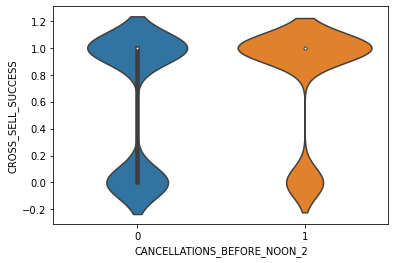

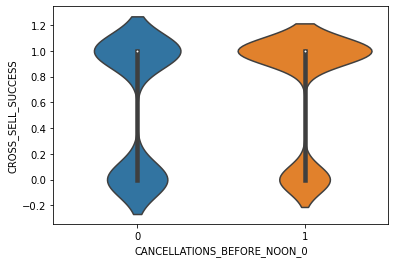

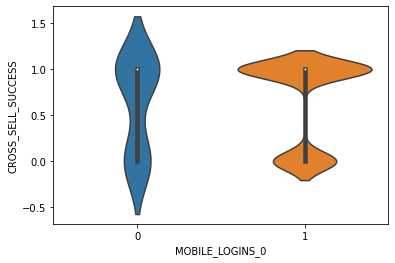

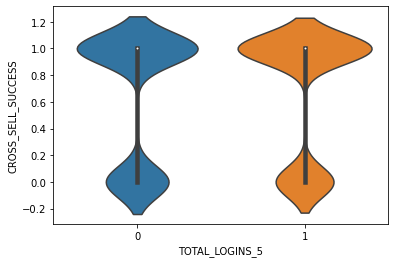

In [12]:
# creating new dummy variable for binary split
ap_chef['CANCELLATIONS_BEFORE_NOON_2'] = 0
ap_chef['CANCELLATIONS_BEFORE_NOON_0'] = 0
ap_chef['MOBILE_LOGINS_0']             = 0
ap_chef['TOTAL_LOGINS_5']                 = 0


# iterating over original column to change values in the new feature column
for index, value in ap_chef.iterrows():

    if ap_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] >= 2:
        ap_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON_2'] = 1
        
    if ap_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        ap_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON_0'] = 1
        
    if ap_chef.loc[index, 'MOBILE_LOGINS'] > 0:
        ap_chef.loc[index, 'MOBILE_LOGINS_0'] = 1
        
    if ap_chef.loc[index, 'TOTAL_LOGINS'] > 5:
        ap_chef.loc[index, 'TOTAL_LOGINS_5'] = 1

        
# visualizing the new distribution
sns.violinplot(x    = 'CANCELLATIONS_BEFORE_NOON_2',
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

sns.violinplot(x    = 'CANCELLATIONS_BEFORE_NOON_0',
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

sns.violinplot(x    = 'MOBILE_LOGINS_0',
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

sns.violinplot(x    = 'TOTAL_LOGINS_5',
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

### Combination variables from binary variables

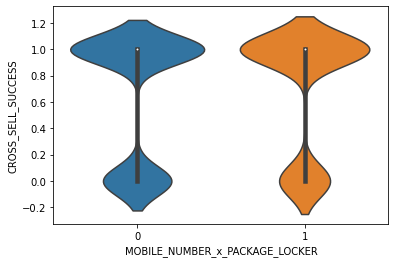

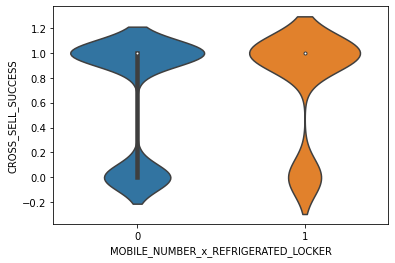


A refridgerated locker is a type of package locker. As such, any customer with
the latter necessarily has the former as well. PACKAGE_LOCKER_x_REFRIGERATED_LOCKER
is therefore a redundant category and needs to be removed.

There does however appear to be a link between customers who registered a mobile
number and have refridgerated lockers avaialble.


In [13]:
# creating binary dummy variable
ap_chef['MOBILE_NUMBER_x_PACKAGE_LOCKER']          = ap_chef['MOBILE_NUMBER']  * ap_chef['PACKAGE_LOCKER']
ap_chef['MOBILE_NUMBER_x_REFRIGERATED_LOCKER']     = ap_chef['MOBILE_NUMBER']  * ap_chef['REFRIGERATED_LOCKER']
#ap_chef['PACKAGE_LOCKER_x_REFRIGERATED_LOCKER']     = ap_chef['PACKAGE_LOCKER'] * ap_chef['REFRIGERATED_LOCKER']


# visualizing results

    # for MOBILE_NUMBER_x_PACKAGE_LOCKER
sns.violinplot(x    = 'MOBILE_NUMBER_x_PACKAGE_LOCKER',
            y    = 'CROSS_SELL_SUCCESS',
            data = ap_chef)
plt.show()

    # for MOBILE_NUMBER_x_REFRIGERATED_LOCKER
sns.violinplot(x    = 'MOBILE_NUMBER_x_REFRIGERATED_LOCKER',
            y    = 'CROSS_SELL_SUCCESS',
            data = ap_chef)
plt.show()

    # for PACKAGE_LOCKER_x_REFRIGERATED_LOCKER
#sns.boxplot(x    = 'PACKAGE_LOCKER_x_REFRIGERATED_LOCKER',
#            y    = 'CROSS_SELL_SUCCESS',
#            data = ap_chef)
#plt.show()


# ANALYSIS
print("""
A refridgerated locker is a type of package locker. As such, any customer with
the latter necessarily has the former as well. PACKAGE_LOCKER_x_REFRIGERATED_LOCKER
is therefore a redundant category and needs to be removed.

There does however appear to be a link between customers who registered a mobile
number and have refridgerated lockers avaialble.""")

### Numerical coding of categorical variables

#### Gender

In [14]:
# Importing gender data

file = './gender.xlsx'
gender = pd.read_excel(file)

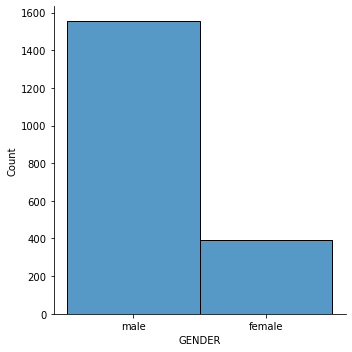

In [15]:
# Applying gender data to ap_chef


# creating the new variable
ap_chef['GENDER'] = 0


# loop to lookup gender in ap_chef on the gender file
index = 0

for name in ap_chef.loc[: , 'FIRST_NAME']:
    sex = gender.loc[:, 'Gender'][gender.loc[: , 'Name'] == name].to_string(index=False)
    ap_chef.loc[index, 'GENDER'] = sex
    index += 1
    
    
# Distibution of gender - checking for sufficient data in both categories
sns.displot(x = ap_chef['GENDER'])
plt.show()

In [16]:
# Creating a new column to take binary data
ap_chef['female'] = 0


# iterating over original column to change values in the new feature column
for index, value in ap_chef.iterrows():

    if ap_chef.loc[index, 'GENDER'] == 'female':
        ap_chef.loc[index, 'female'] = 1
        

# dropping GENDER as it has been coded with female
ap_chef = ap_chef.drop('GENDER', axis = 1)

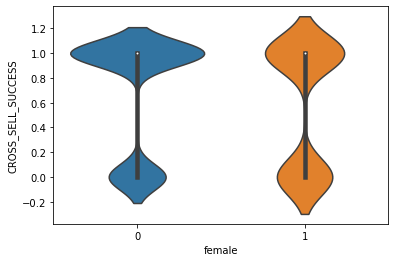

In [17]:
# Visualizing results
sns.violinplot(x    = 'female',
               y    = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

In [18]:
# ANALYSIS
print("""
Stereotypes would suggest that gender can speak towards the probability of
one's relationship with cooking and the kitchen. We now have a variable we
can use to dertermine whether there is a more profitable segment between women
and men""")


Stereotypes would suggest that gender can speak towards the probability of
one's relationship with cooking and the kitchen. We now have a variable we
can use to dertermine whether there is a more profitable segment between women
and men


#### Email domain

Customers using email addresses from different domain types may exhibit
different behavior. Creating variables so this can be further explored


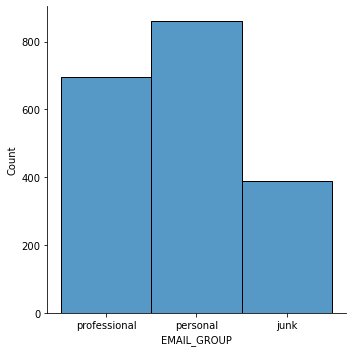

In [19]:
# Theory
print("""Customers using email addresses from different domain types may exhibit
different behavior. Creating variables so this can be further explored""")


# Creating new variable
ap_chef['EMAIL_GROUP'] = 0


# Creating loop to distinguish email categories
for index, obs in ap_chef.iterrows() :
    
    if 'gmail.com' in ap_chef.loc[index, 'EMAIL'] or \
            'yahoo.com' in ap_chef.loc[index, 'EMAIL'] or \
            'protonmail.com' in ap_chef.loc[index, 'EMAIL']:
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'personal'
    
    elif 'me.com' in ap_chef.loc[index, 'EMAIL'] or \
            'aol.com' in ap_chef.loc[index, 'EMAIL'] or \
            'hotmail.com' in ap_chef.loc[index, 'EMAIL'] or \
            'live.com' in ap_chef.loc[index, 'EMAIL'] or \
            'msn.com' in ap_chef.loc[index, 'EMAIL'] or \
            'passport.com' in ap_chef.loc[index, 'EMAIL']:
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'junk'
    
    else :
        
        ap_chef.loc[index, 'EMAIL_GROUP'] = 'professional'

        
# examining the dsitribution of each category        
sns.displot (ap_chef['EMAIL_GROUP'])
plt.show()

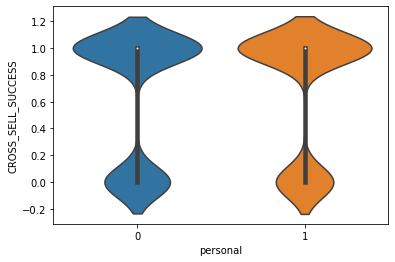

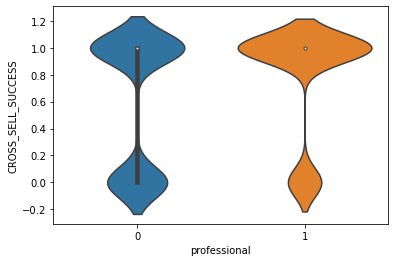

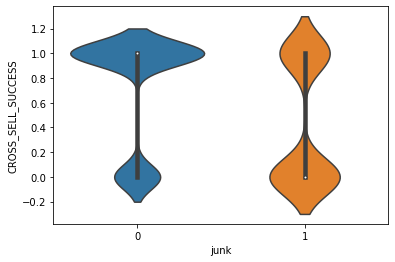

In [20]:
# creating dummy variables
one_hot_EMAIL = pd.get_dummies(ap_chef['EMAIL_GROUP'])


# dropping categorical variable after it's been encoded
ap_chef = ap_chef.drop('EMAIL_GROUP', axis=1)


# joining the data together
ap_chef = ap_chef.join(one_hot_EMAIL)


# visualizing the results
sns.violinplot(x = 'personal',
              y = 'CROSS_SELL_SUCCESS',
              data = ap_chef)
plt.show()

sns.violinplot(x = 'professional',
              y = 'CROSS_SELL_SUCCESS',
              data = ap_chef)
plt.show()

sns.violinplot(x = 'junk',
              y = 'CROSS_SELL_SUCCESS',
              data = ap_chef)
plt.show()

## Totals have more significance?

In [21]:
# Adding variable for total number of times cancelled
ap_chef['TOTAL_CANCELLATIONS'] = ap_chef['CANCELLATIONS_BEFORE_NOON'] + ap_chef['CANCELLATIONS_AFTER_NOON']

# Adding variable for total number of logins
ap_chef['PC_LOGINS'] = ap_chef['TOTAL_LOGINS'] - ap_chef['MOBILE_LOGINS']

# Adding variable for total off_schedule deliveries
ap_chef['TOTAL_OFF_SCHEDULE'] = ap_chef['EARLY_DELIVERIES'] + ap_chef['LATE_DELIVERIES']

## Variables representing customer experience

### Revenue


Goal: determine how much each customer is spending on average per meal. Because 
we know the price range of different meals, further extrapolations can be made
from this.


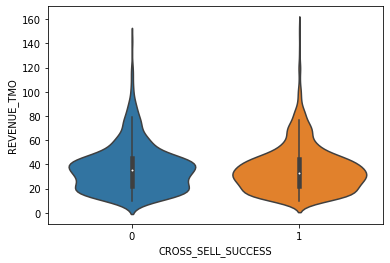

In [22]:
# Goal
print("""
Goal: determine how much each customer is spending on average per meal. Because 
we know the price range of different meals, further extrapolations can be made
from this.""")

# defining new variable
ap_chef['REVENUE_TMO'] = ap_chef['REVENUE'] / ap_chef['TOTAL_MEALS_ORDERED']


# visual representation of variable
sns.violinplot(x = 'CROSS_SELL_SUCCESS',
           y = 'REVENUE_TMO',
           data = ap_chef)
plt.show()

#### Wine consumption

In [23]:
# Theory
print("""
Meal sets cost anywhere from $10 to $23. That means that anyone spending more
than $23/meal on average are buying beverages. The most you can spend on non
alcoholic beverages is $5 so anyone spending more than $28 on avergae is getting
wine with almost every meal.""")


# Building the dummy variables
ap_chef['WINE_def']   = 0


# Defining the tiers

    # above the max they could pay if getting the most expensive meals + drinks
ap_chef['WINE_def']   = ap_chef['WINE_def'].where(ap_chef['REVENUE_TMO'] > 28, 1)


Meal sets cost anywhere from $10 to $23. That means that anyone spending more
than $23/meal on average are buying beverages. The most you can spend on non
alcoholic beverages is $5 so anyone spending more than $28 on avergae is getting
wine with almost every meal.


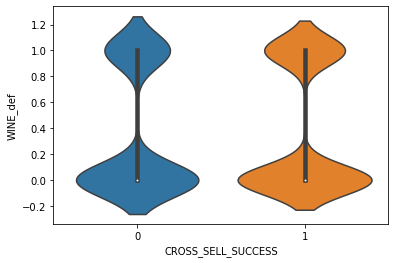

In [24]:
# Visualizing the results
sns.violinplot(y = 'WINE_def',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

### Cancellations

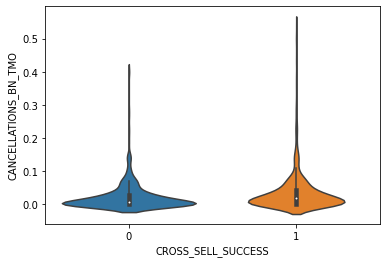

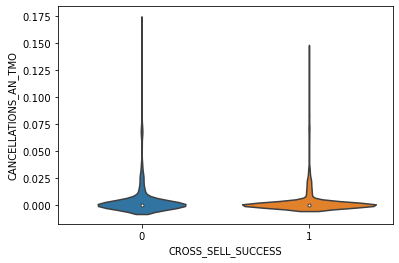

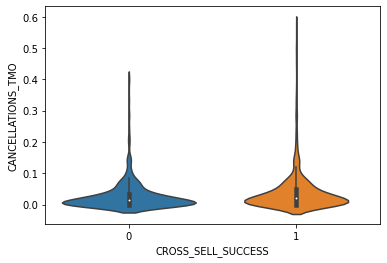


The ratio of cancellations to total meals ordered appears to have some influence
over the probability of successfully cross-selling the promotion.


In [25]:
# Creating the new variable
ap_chef['CANCELLATIONS_BN_TMO'] = ap_chef['CANCELLATIONS_BEFORE_NOON'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['CANCELLATIONS_AN_TMO'] = ap_chef['CANCELLATIONS_AFTER_NOON'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['CANCELLATIONS_TMO'] = ap_chef['TOTAL_CANCELLATIONS'] / ap_chef['TOTAL_MEALS_ORDERED']


# Visualizing the results
sns.violinplot(y = 'CANCELLATIONS_BN_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'CANCELLATIONS_AN_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'CANCELLATIONS_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()


# ANALYSIS
print("""
The ratio of cancellations to total meals ordered appears to have some influence
over the probability of successfully cross-selling the promotion.""")

### Customer service

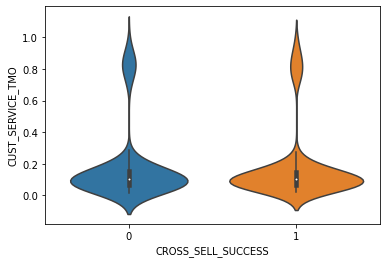

In [26]:
# Creating the new variable
ap_chef['CUST_SERVICE_TMO'] = ap_chef['CONTACTS_W_CUSTOMER_SERVICE'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.violinplot(y = 'CUST_SERVICE_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

### Off schedule

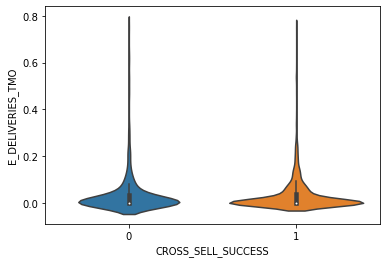

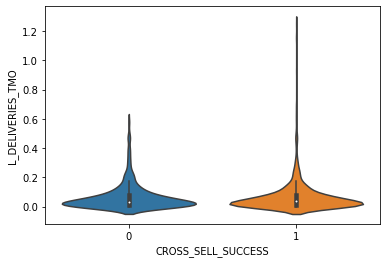

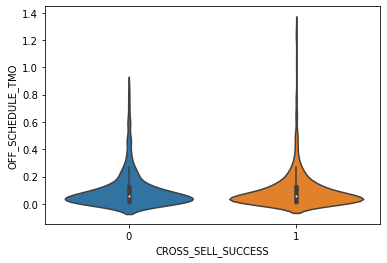

In [27]:
# Creating the new variables
ap_chef['E_DELIVERIES_TMO'] = ap_chef['EARLY_DELIVERIES'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['L_DELIVERIES_TMO'] = ap_chef['LATE_DELIVERIES'] / ap_chef['TOTAL_MEALS_ORDERED']
ap_chef['OFF_SCHEDULE_TMO'] = ap_chef['TOTAL_OFF_SCHEDULE'] / ap_chef['TOTAL_MEALS_ORDERED']


# Visualizing the results
sns.violinplot(y = 'E_DELIVERIES_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'L_DELIVERIES_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'OFF_SCHEDULE_TMO',
           x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

### Unique meals

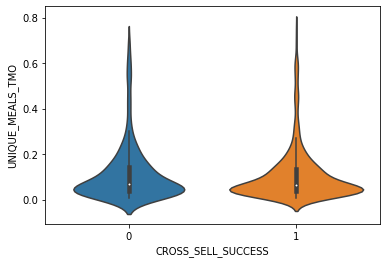

In [28]:
# Creating the new variables
ap_chef['UNIQUE_MEALS_TMO'] = ap_chef['UNIQUE_MEALS_PURCH'] / ap_chef['TOTAL_MEALS_ORDERED']

# Visualizing the results
sns.violinplot(y = 'UNIQUE_MEALS_TMO',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

## Customer behavior

### Number of orders placed

In [29]:
# Number of orders placed
ap_chef['TOTAL_ORDERS'] = ap_chef['TOTAL_MEALS_ORDERED'] / ap_chef['AVERAGE_MEALS_PER_CUST']

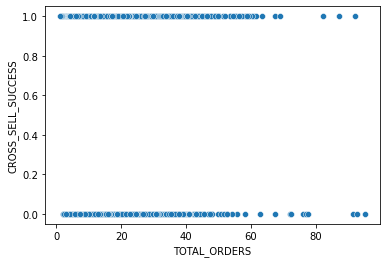

In [30]:
# Visualizing results
sns.scatterplot(x = 'TOTAL_ORDERS',
               y = 'CROSS_SELL_SUCCESS',
               data = ap_chef)
plt.show()

### Engagement

#### Engagement Y/N

In [31]:
# A customer is considered engaged when they take advantage of optional services
# offered by apprentice chef (these include specifying TASTES_AND_PREFERENCES, 
# benefitting from WEEKLY_PLAN discounts and MASTER_CLASSES_ATTENDED)


# creating empty column
ap_chef['TASTES_AND_PREFERENCES_WEEKLY_PLAN']             = 0
ap_chef['TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED'] = 0
ap_chef['WEEKLY_PLAN_MASTER_CLASSES_ATTENDED']            = 0


# loop to capture all 
for index, col in ap_chef.iterrows():
    
    if ap_chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1 and \
       ap_chef.loc[index, 'WEEKLY_PLAN'] > 0:
        ap_chef.loc[index, 'TASTES_AND_PREFERENCES_WEEKLY_PLAN'] = 1
        
    if ap_chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1 and \
       ap_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        ap_chef.loc[index, 'TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED'] = 1

    if ap_chef.loc[index, 'WEEKLY_PLAN'] > 0 and \
       ap_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        ap_chef.loc[index, 'WEEKLY_PLAN_MASTER_CLASSES_ATTENDED'] = 1

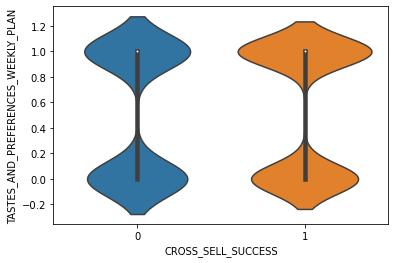

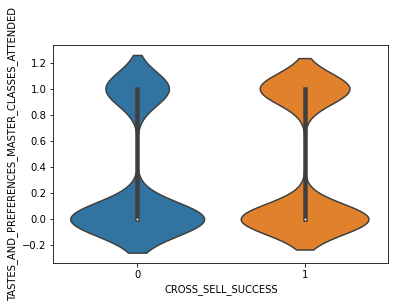

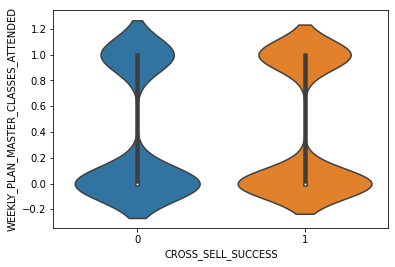

In [32]:
# visualizing results
sns.violinplot(y = 'TASTES_AND_PREFERENCES_WEEKLY_PLAN',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.violinplot(y = 'WEEKLY_PLAN_MASTER_CLASSES_ATTENDED',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

#### Engagement as a value

In [33]:
# The more a customer uses these optional services, the more engaged they are.
# We also want to measure that and it's potential impact on their decision to
# opt into other optional services


# creating empty column
ap_chef['TASTES_AND_PREFERENCES_x_WEEKLY_PLAN']             = ap_chef['TASTES_AND_PREFERENCES'] * ap_chef['WEEKLY_PLAN']
ap_chef['TASTES_AND_PREFERENCES_x_MASTER_CLASSES_ATTENDED'] = ap_chef['TASTES_AND_PREFERENCES'] * ap_chef['MASTER_CLASSES_ATTENDED']
ap_chef['WEEKLY_PLAN_x_MASTER_CLASSES_ATTENDED']            = ap_chef['WEEKLY_PLAN'] * ap_chef['MASTER_CLASSES_ATTENDED']

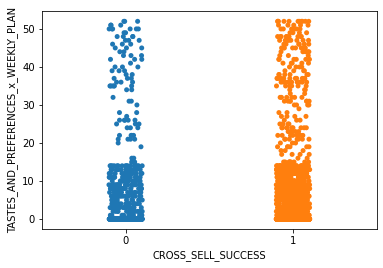

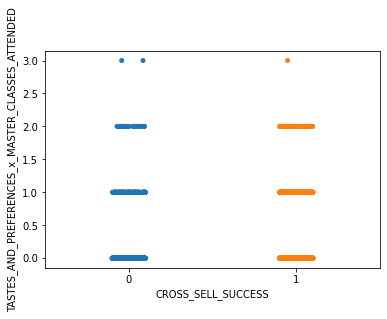

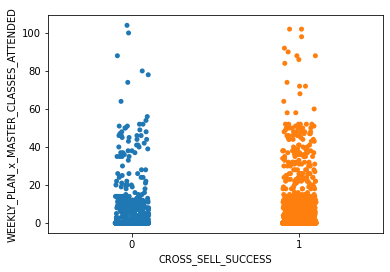

In [34]:
# visualizing results
sns.stripplot(y = 'TASTES_AND_PREFERENCES_x_WEEKLY_PLAN',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.stripplot(y = 'TASTES_AND_PREFERENCES_x_MASTER_CLASSES_ATTENDED',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

sns.stripplot(y = 'WEEKLY_PLAN_x_MASTER_CLASSES_ATTENDED',
            x = 'CROSS_SELL_SUCCESS',
          data = ap_chef)
plt.show()

# Building an initial model

## Verifiying correlation

In [35]:
# dropping columns we won't need

    # dropping categorical variables
ap_chef_explanatory = ap_chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis=1)

df_corr = ap_chef_explanatory.corr(method = 'pearson').round(decimals = 2)


# Exploting correlation (looking for minimum number of significant variables)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                                  1.00
professional                                        0.19
CANCELLATIONS_BEFORE_NOON_2                         0.17
CANCELLATIONS_BEFORE_NOON                           0.16
CANCELLATIONS_BEFORE_NOON_0                         0.14
TOTAL_CANCELLATIONS                                 0.14
CANCELLATIONS_BN_TMO                                0.11
MOBILE_NUMBER                                       0.10
CANCELLATIONS_TMO                                   0.10
TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED      0.09
TASTES_AND_PREFERENCES                              0.08
PC_LOGINS                                           0.07
MOBILE_NUMBER_x_REFRIGERATED_LOCKER                 0.07
REFRIGERATED_LOCKER                                 0.07
TASTES_AND_PREFERENCES_x_MASTER_CLASSES_ATTENDED    0.07
MOBILE_NUMBER_x_PACKAGE_LOCKER                      0.06
personal                                            0.04
TOTAL_LOGINS_5                 

In [36]:
# formatting each explanatory variable for statsmodels
for val in ap_chef_explanatory:
    print (f"{val} +")

REVENUE +
CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
TOTAL_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVERAGE_MEALS_PER_CUST +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
REVENUE_m +
TOTAL_MEALS_ORDERED_m +
AVG_TIME_PER_SITE_VISIT_m +
AVG_PREP_VID_TIME_m +
TOTAL_PHOTOS_VIEWED_m +
CANCELLATIONS_BEFORE_NOON_2 +
CANCELLATIONS_BEFORE_NOON_0 +
MOBILE_LOGINS_0 +
TOTAL_LOGINS_5 +
MOBILE_NUMBER_x_PACKAGE_LOCKER +
MOBILE_NUMBER_x_REFRIGERATED_LOCKER +
female +
junk +
personal +
professional +
TOTAL_CANCELLATIONS +
PC_LOGINS +
TOTAL_OFF_SCHEDULE +
REVENUE_TMO +
WINE_def +
CANCELLATIONS_BN_TMO +
CANCELLATIONS_AN_TMO +
CANCELLATIONS_TMO +
CUST_SERVICE_TMO +
E_DEL

## The 1st model

In [37]:
## Building a first model

lm_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~ TOTAL_MEALS_ORDERED +
                                                    CONTACTS_W_CUSTOMER_SERVICE +
                                                    MOBILE_NUMBER +
                                                    CANCELLATIONS_BEFORE_NOON +
                                                    TOTAL_LOGINS +
                                                    MOBILE_LOGINS +
                                                    REFRIGERATED_LOCKER +
                                                    CANCELLATIONS_BEFORE_NOON_2 +
                                                    female +
                                                    junk +
                                                    professional +
                                                    TOTAL_CANCELLATIONS +
                                                    WINE_def +
                                                    TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED""",
                               data = ap_chef_explanatory)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.543836
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1931
Method:                           MLE   Df Model:                           14
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1337
Time:                        06:22:57   Log-Likelihood:                -1058.3
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                 3.300e-61
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.2720      0.589     -2.158      0.031      -2.427      -0.117
TOTAL_MEALS_ORDERED                               -0.0033      0.001     -2.685      0.007      -0.006      -0.001
CONTACTS_W_CUSTOMER_SERVICE                        0.0516      0.024      2.153      0.031       0.005       0.099
MOBILE_NUMBER                                      0.8144      0.154      5.286      0.000       0.512       1.116
CANCELLATIONS_BEFORE_NOON                          0.4270      0.134      3.180      0.001       0.164       0.690
TOTAL_LOGINS                                       0.1881      0.093      2.026      0.043       0.006       0.370
MOBILE_LOGINS                                     -0.2113      0.101     -2.087      0.037      -0.410      -0.013
REFRIGERATED_LOCKER                                0.4828      0.181      2.673      0.008       0.129       0.837
CANCELLATIONS_BEFORE_NOON_2                        0.5799      0.203      2.864      0.004       0.183       0.977
female                                            -0.5381      0.128     -4.189      0.000      -0.790      -0.286
junk                                              -1.2715      0.135     -9.442      0.000      -1.535      -1.008
professional                                       0.6131      0.126      4.874      0.000       0.367       0.860
TOTAL_CANCELLATIONS                               -0.2949      0.119     -2.470      0.014      -0.529      -0.061
WINE_def                                           0.4250      0.144      2.950      0.003       0.143       0.707
TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED     0.4799      0.116      4.148      0.000       0.253       0.707
==================================================================================================================
"""

In [38]:
# Statistically significant variables. Tring different combinations
OLS_var = ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER',
           'CANCELLATIONS_BEFORE_NOON', 'TOTAL_LOGINS', 'MOBILE_LOGINS',
           'REFRIGERATED_LOCKER', 'CANCELLATIONS_BEFORE_NOON_2', 'female', 'junk',
           'professional', 'TOTAL_CANCELLATIONS', 'WINE_def',
           'TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED']


OLS_var_1 = ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER',
             'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'REFRIGERATED_LOCKER',
             'CANCELLATIONS_BEFORE_NOON_2', 'MOBILE_LOGINS_0', 'female', 'junk', 'professional', 
             'WINE_def', 'CUST_SERVICE_TMO', 'TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED']
# CANCELLATIONS_BN_TMO, MOBILE_LOGINS


OLS_var_2 = ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER',
             'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
             'TOTAL_LOGINS', 'MOBILE_LOGINS', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
             'female', 'professional', 'WINE_def']
#junk


# Variables with a p-value < 0.5
OLS_05 = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
          'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'TOTAL_LOGINS',
          'MOBILE_LOGINS', 'EARLY_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
          'AVG_PREP_VID_TIME', 'AVERAGE_MEALS_PER_CUST', 'MASTER_CLASSES_ATTENDED',
          'AVG_CLICKS_PER_VISIT', 'CANCELLATIONS_BEFORE_NOON_2', 'CANCELLATIONS_BEFORE_NOON_0',
          'MOBILE_LOGINS_0', 'MOBILE_NUMBER_x_PACKAGE_LOCKER', 'MOBILE_NUMBER_x_REFRIGERATED_LOCKER',
          'female', 'junk', 'professional', 'TOTAL_CANCELLATIONS', 'WINE_def',
          'CANCELLATIONS_TMO', 'CUST_SERVICE_TMO', 'E_DELIVERIES_TMO', 'OFF_SCHEDULE_TMO',
          'UNIQUE_MEALS_TMO', 'TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED',
          'TASTES_AND_PREFERENCES_x_WEEKLY_PLAN', 'WEEKLY_PLAN_x_MASTER_CLASSES_ATTENDED']

# Scikit-learn

## User defined functions

In [39]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Dataframe for scoring

In [40]:
# Setting criteria as headers
criteria = ['Model type', 'Train score', 'Test score', 'Train-Test gap',
            'AUC score', 'Confusion Matrix', 'Model variables', 'Model parameters']

# building list with headers specified
performance = pd.DataFrame(columns = criteria)

# Scikit-learn OLS var 2 set

In [41]:
# Defining our variables dataframe and reponse variable dataframe
X = ap_chef_explanatory.loc[:, OLS_var_2]
y = ap_chef_explanatory.loc[:, 'CROSS_SELL_SUCCESS']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            stratify = y,
            test_size = 0.25,
            random_state = 219)

## DecisionTreeClassifier()

### Using cross validation to tune model

In [42]:
# declaring a hyperparameter space
#criterion          = ['gini', 'entropy']
#splitter           = ['best', 'random']
#max_depth          = np.arange(3,9)
#min_samples_split  = np.arange(2,30)
#min_impurity_decrease = np.arange(0,1.1,0.1)
#max_leaf_nodes     = np.arange(3,50)

# creating a hyperparameter grid
#param_grid = {'criterion'             : criterion,
#              'splitter'              : splitter,
#              'max_depth'             : max_depth,
#              'min_samples_split'     : min_samples_split,
#              'min_impurity_decrease' : min_impurity_decrease,
#              'max_leaf_nodes'        : max_leaf_nodes}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = DecisionTreeClassifier(random_state = 219)


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid,        # parameters to tune
#                              cv                  = 3,                 # how many folds in cross-validation
#                              n_iter              = 1500,               # number of combinations of hyperparameters to try
#                              random_state        = 219,               # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [43]:
#print(tuned_cv.best_estimator_)

Tree Training ACCURACY: 0.7204
Tree Testing ACCURACY : 0.7146
Tree Train-Test gap   : 0.005800000000000027
Tree AUC Score        : 0.6104

True Negatives : 50
False Positives: 106
False Negatives: 33
True Positives : 298



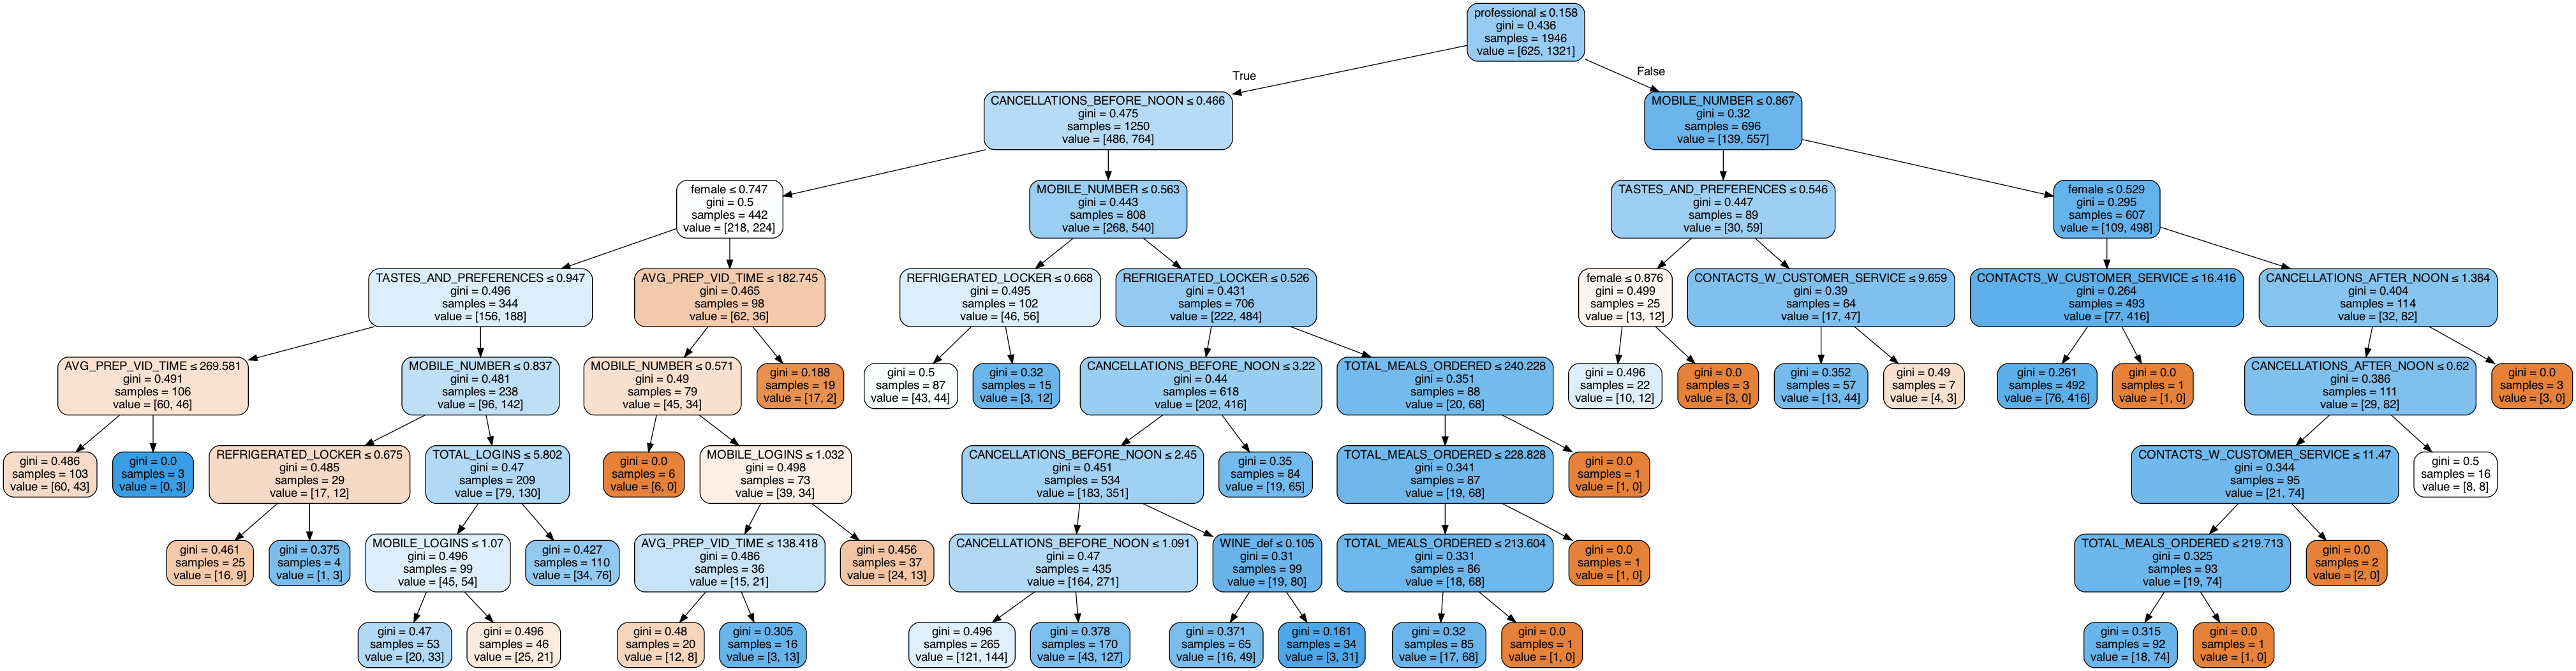

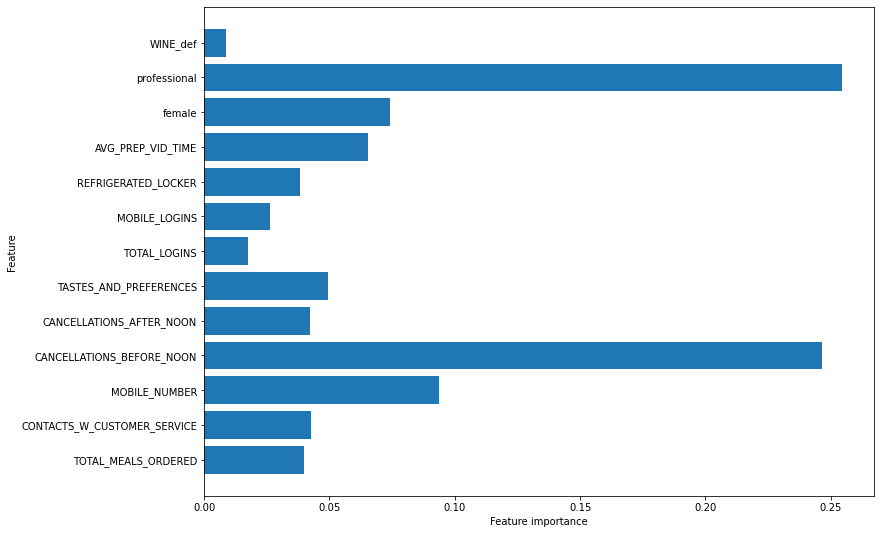

In [44]:
# INSTANTIATING a classification tree object
tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=34, min_samples_split=25,
                       random_state=219, splitter='random')


# FITTING the training data
tree_fit = tree.fit(X, y)


# PREDICTING on new data
y_pred = tree.predict(X_test)


# SCORING the model
train_score = tree.score(X_train, y_train).round(4) # accuracy
test_score  = tree.score(X_test, y_test).round(4)   # accuracy
gap         = train_score - test_score


# saving AUC
auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = y_pred).round(4) # auc


# printing the model scores
print('Tree Training ACCURACY:', train_score)
print('Tree Testing ACCURACY :', test_score)
print('Tree Train-Test gap   :', gap)
print('Tree AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'DecisionTreeClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  :(tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_2',
                'Model parameters'  : tree},
            ignore_index = True)


# Plotting important variables
plot_feature_importances(model = tree_fit, train = X_train, export = False)


# calling display_tree
display_tree(tree       = tree,
             feature_df = X_train)

## KNeighborsClassifier()

### Scaling the data

In [45]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(X)


# TRANSFORMING the data
X_scaled = scaler.transform(X)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            y,
            random_state = 219,
            test_size = 0.25,
            stratify = y)

### Using cross validation to tune model

In [46]:
# declaring a hyperparameter space
#n_neighbors = np.arange(1,20)
#weights     = ['uniform', 'distance']
#algorithm   = ['auto', 'ball_tree', 'kd_tree', 'brute']
#leaf_size   = np.arange(1,100, 3)
#p           = [1, 2]


# creating a hyperparameter grid
#param_grid = {'n_neighbors' : n_neighbors,
#              'weights'     : weights,
#              'algorithm'   : algorithm,
#              'leaf_size'   : leaf_size,
#              'p'           : p}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = KNeighborsClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 1000,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X_scaled, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [47]:
#print(tuned_cv.best_estimator_)

In [48]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=67, n_neighbors=4)


# FITTING the training data
knn_fit = knn.fit(X_scaled, y)


# PREDICTING based on the testing set
y_pred = knn_fit.predict(X_test_scaled)


# saving scoring data
train_score = knn.score(X_train_scaled, y_train).round(4)
test_score  = knn.score(X_test_scaled, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                                y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'KNeighborsClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_2 standardized',
                'Model parameters'  : knn},
            ignore_index = True)

Training ACCURACY: 0.7704
Testing  ACCURACY: 0.7721
Train-Test gap   : -0.0017000000000000348
AUC Score        : 0.7679

True Negatives : 118
False Positives: 38
False Negatives: 73
True Positives : 258



## RandomForestClassifier()

### Cross validation

In [49]:
# declaring a hyperparameter space
#estimator_space  = np.arange(400, 1000, 100)
#leaf_space       = np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]
#max_depth        = np.arange(2,8)


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space,
#              'max_depth'        : max_depth}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = RandomForestClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 600,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [50]:
# best estimators based on RandomizedSearchCV
#tuned_cv.best_estimator_

Training ACCURACY: 0.769
Testing  ACCURACY: 0.768
Train-Test gap   : 0.0010000000000000009
AUC Score        : 0.6446

True Negatives : 47
False Positives: 109
False Negatives: 4
True Positives : 327



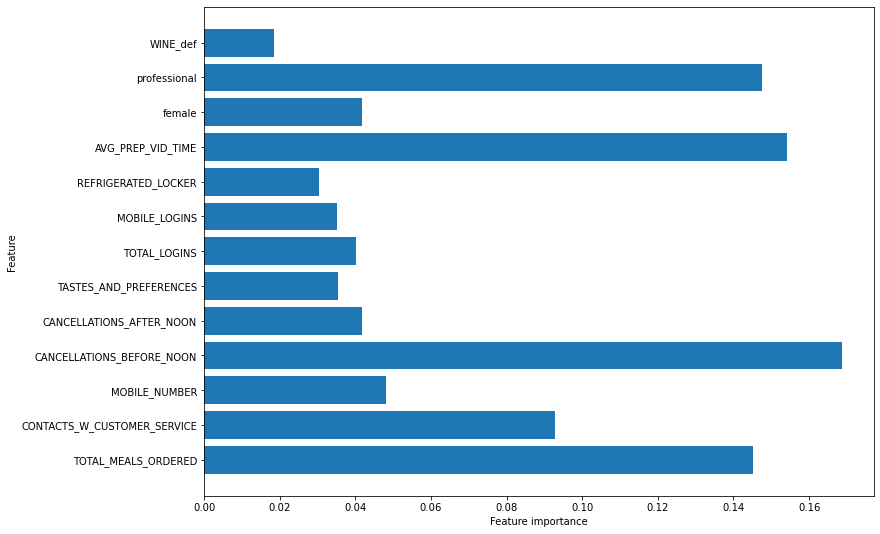

In [51]:
# INSTANTIATING a Random Forest Classification model
forest = RandomForestClassifier(max_depth=7, n_estimators=600, random_state=219)

# FITTING the training data
forest_fit = forest.fit(X, y)


# PREDICTING based on the testing set
y_pred = forest_fit.predict(X_test)


# saving scoring data
train_score = forest.score(X_train, y_train).round(4)
test_score  = forest.score(X_test, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                            y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'RandomForestClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_2',
                'Model parameters'  : forest},
            ignore_index = True)


# plotting the most important features
plot_feature_importances(forest, X_train)

## GradientBoostingClassifier()

### Cross validation

In [52]:
# declaring a hyperparameter space
#learn_space        = np.arange(0.1,2.0,0.2)
#estimator_space    = np.arange(100,200,25)
#depth_space        = np.arange(3,9,1)
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space,
#              'warm_start'    : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = GradientBoostingClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 1500,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [53]:
# best estimators based on RandomizedSearchCV
#tuned_cv.best_estimator_

Training ACCURACY: 1.0
Testing  ACCURACY: 1.0
Train-Test gap   : 0.0
AUC Score        : 1.0

True Negatives : 156
False Positives: 0
False Negatives: 0
True Positives : 331



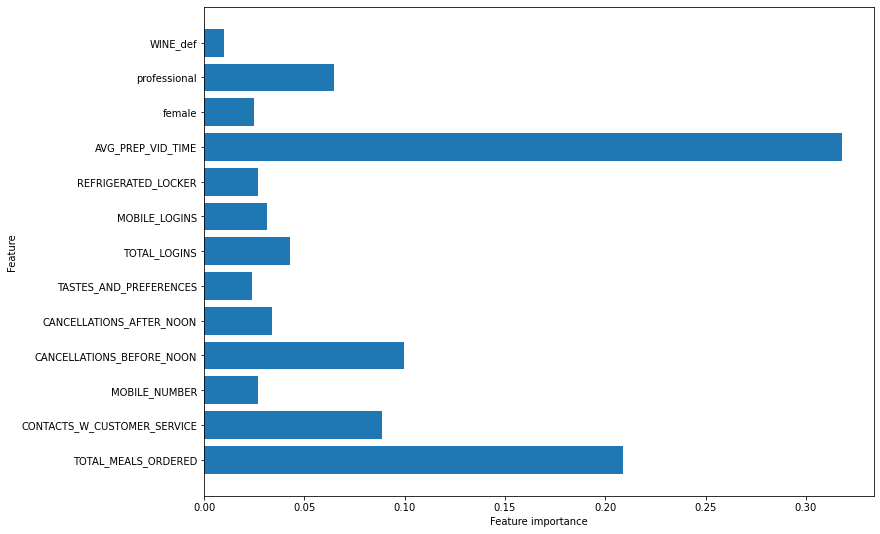

In [54]:
# INSTANTIATING the model
gradient = GradientBoostingClassifier(learning_rate=1.5000000000000004, max_depth=8,
                           warm_start=True, random_state=219)


# FITTING the training data
gradient_fit = gradient.fit(X, y)


# PREDICTING based on the testing set
y_pred = gradient_fit.predict(X_test)


# saving scoring data
train_score = gradient.score(X_train, y_train).round(4)
test_score  = gradient.score(X_test, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                            y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'GradientBoostingClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_2',
                'Model parameters'  : gradient},
            ignore_index = True)


# Plotting important variables
plot_feature_importances(model = gradient_fit, train = X_train, export = False)

# Scikit-learn OLS var 1 set

In [55]:
# Defining our variables dataframe and reponse variable dataframe
X = ap_chef_explanatory.loc[:, OLS_var_1]
y = ap_chef_explanatory.loc[:, 'CROSS_SELL_SUCCESS']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            stratify = y,
            test_size = 0.25,
            random_state = 219)

## LogisticRegression()

### Using cross validation to tune model

In [56]:
# declaring a hyperparameter space
#dual             = [True, False]
#tol              = np.arange(0, 0.5, 0.0002)
#C_space          = np.arange(0.1, 5.0, 0.1)
#warm_start_space = [True, False]
#solver_space     = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#multi_class      = ['auto', 'ovr', 'multinomial']


# creating a hyperparameter grid
#param_grid = {'dual'        : dual,
#              'tol'         : tol,
#              'C'           : C_space,
#              'warm_start'  : warm_start_space,
#              'solver'      : solver_space,
#              'multi_class' : multi_class}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 3000)


# RandomizedSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                 cv                  = 3,          # how many folds in cross-validation
#                                 n_iter              = 500,        # number of combinations of hyperparameters to try
#                                 random_state        = 219,        # starting point for random sequence
#                                 scoring = make_scorer(
#                                           roc_auc_score,
#                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

### Applying the model

In [57]:
#print(lr_tuned_cv.best_estimator_)

In [58]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(C=3.1, max_iter=3000, multi_class='ovr', random_state=219,
                   solver='liblinear', tol=0.003, warm_start=True)

# FITTING the training data
logreg_fit = logreg.fit(X, y)


# PREDICTING based on the testing set
y_pred = logreg_fit.predict(X_test)


# saving scoring data
train_score = logreg.score(X_train, y_train).round(4)
test_score  = logreg.score(X_test, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                            y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'LogisticRegression',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_1',
                'Model parameters'  : logreg},
            ignore_index = True)

Training ACCURACY: 0.7265
Testing  ACCURACY: 0.7495
Train-Test gap   : -0.02300000000000002
AUC Score        : 0.6463

True Negatives : 56
False Positives: 100
False Negatives: 22
True Positives : 309



### Coefficients

In [59]:
# zipping each feature name to its coefficient
logreg_model_values = zip(X[OLS_var_1].columns,
                          logreg_fit.coef_.ravel().round(decimals = 4))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.0858)
('TOTAL_MEALS_ORDERED', -0.0029)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0462)
('MOBILE_NUMBER', 0.5441)
('CANCELLATIONS_AFTER_NOON', -0.3186)
('TOTAL_LOGINS', -0.0082)
('REFRIGERATED_LOCKER', 0.3452)
('CANCELLATIONS_BEFORE_NOON_2', 0.9033)
('MOBILE_LOGINS_0', -0.0439)
('female', -0.5271)
('junk', -1.2364)
('professional', 0.6856)
('WINE_def', 0.2935)
('CUST_SERVICE_TMO', -0.1115)
('TASTES_AND_PREFERENCES_MASTER_CLASSES_ATTENDED', 0.4552)


## DecisionTreeClassifier()

### Cross validation

In [60]:
# declaring a hyperparameter space
#criterion          = ['gini', 'entropy']
#splitter           = ['best', 'random']
#max_depth          = np.arange(3,9)
#min_samples_split  = np.arange(2,50)
#min_impurity_decrease = np.arange(0,1.1,0.1)


# creating a hyperparameter grid
#param_grid = {'criterion'             : criterion,
#              'splitter'              : splitter,
#              'max_depth'             : max_depth,
#              'min_samples_split'     : min_samples_split,
#              'min_impurity_decrease' : min_impurity_decrease}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = DecisionTreeClassifier(random_state = 219)


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid,        # parameters to tune
#                              cv                  = 3,                 # how many folds in cross-validation
#                              n_iter              = 450,               # number of combinations of hyperparameters to try
#                              random_state        = 219,               # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [61]:
#print(tuned_cv.best_estimator_)

Tree Training ACCURACY: 0.7423
Tree Testing ACCURACY : 0.7659
Tree Train-Test gap   : -0.023600000000000065
Tree AUC Score        : 0.677

True Negatives : 67
False Positives: 89
False Negatives: 25
True Positives : 306



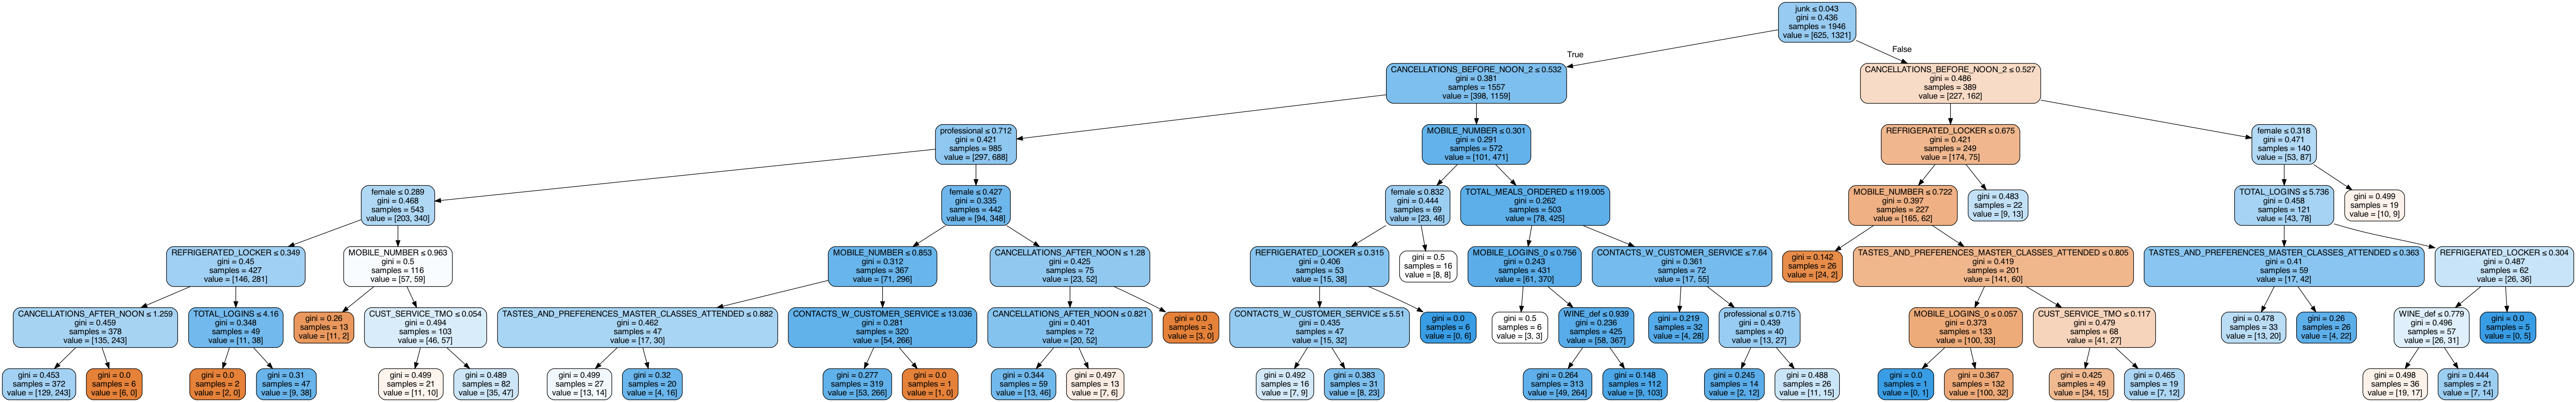

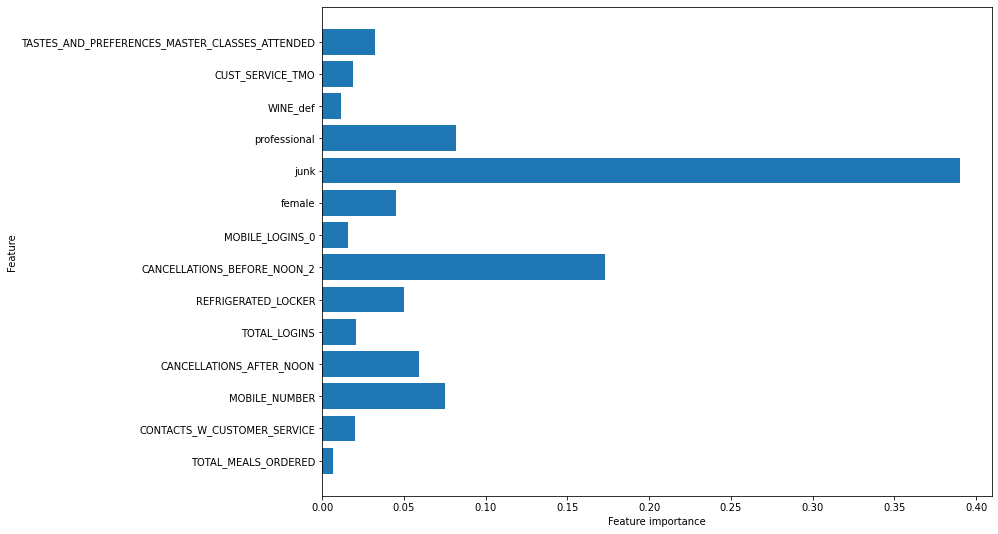

In [62]:
# INSTANTIATING a classification tree object
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=35, random_state=219,
                       splitter='random')


# FITTING the training data
tree_fit = tree.fit(X, y)


# PREDICTING on new data
y_pred = tree.predict(X_test)


# SCORING the model
train_score = tree.score(X_train, y_train).round(4) # accuracy
test_score  = tree.score(X_test, y_test).round(4)   # accuracy
gap         = train_score - test_score


# saving AUC
auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = y_pred).round(4) # auc


# printing the model scores
print('Tree Training ACCURACY:', train_score)
print('Tree Testing ACCURACY :', test_score)
print('Tree Train-Test gap   :', gap)
print('Tree AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'DecisionTreeClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  :(tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_1',
                'Model parameters'  : tree},
            ignore_index = True)


# Plotting important variables
plot_feature_importances(model = tree_fit, train = X_train, export = False)


# calling display_tree
display_tree(tree       = tree,
             feature_df = X_train)

## KNeighborsClassifier()

### Scaling the data

In [63]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(X)


# TRANSFORMING the data
X_scaled = scaler.transform(X)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            y,
            random_state = 219,
            test_size = 0.25,
            stratify = y)

### Cross validation

In [64]:
# declaring a hyperparameter space
#n_neighbors = np.arange(1,20)
#weights     = ['uniform', 'distance']
#algorithm   = ['auto', 'ball_tree', 'kd_tree', 'brute']
#leaf_size   = np.arange(1,100, 3)
#p           = [1, 2]


# creating a hyperparameter grid
#param_grid = {'n_neighbors' : n_neighbors,
#              'weights'     : weights,
#              'algorithm'   : algorithm,
#              'leaf_size'   : leaf_size,
#              'p'           : p}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = KNeighborsClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 500,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [65]:
# best estimators based on RandomizedSearchCV
#tuned_cv.best_estimator_

In [66]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn = KNeighborsClassifier(leaf_size=55, n_neighbors=8, p=1)


# FITTING the training data
knn_fit = knn.fit(X_scaled, y)


# PREDICTING based on the testing set
y_pred = knn_fit.predict(X_test_scaled)


# saving scoring data
train_score = knn.score(X_train_scaled, y_train).round(4)
test_score  = knn.score(X_test_scaled, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                                y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'KNeighborsClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_1 standardized',
                'Model parameters'  : knn},
            ignore_index = True)

Training ACCURACY: 0.7601
Testing  ACCURACY: 0.7577
Train-Test gap   : 0.0023999999999999577
AUC Score        : 0.7048

True Negatives : 87
False Positives: 69
False Negatives: 49
True Positives : 282



## RandomForestClassifier()

### Cross validation

In [67]:
# declaring a hyperparameter space
#estimator_space  = np.arange(500, 1100, 200)
#leaf_space       = np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]
#max_depth        = np.arange(3,8)


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space,
#              'max_depth'        : max_depth}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = RandomForestClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 600,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [68]:
# best estimators based on RandomizedSearchCV
#tuned_cv.best_estimator_

Training ACCURACY: 0.7779
Testing  ACCURACY: 0.7885
Train-Test gap   : -0.010599999999999943
AUC Score        : 0.6868

True Negatives : 63
False Positives: 93
False Negatives: 10
True Positives : 321



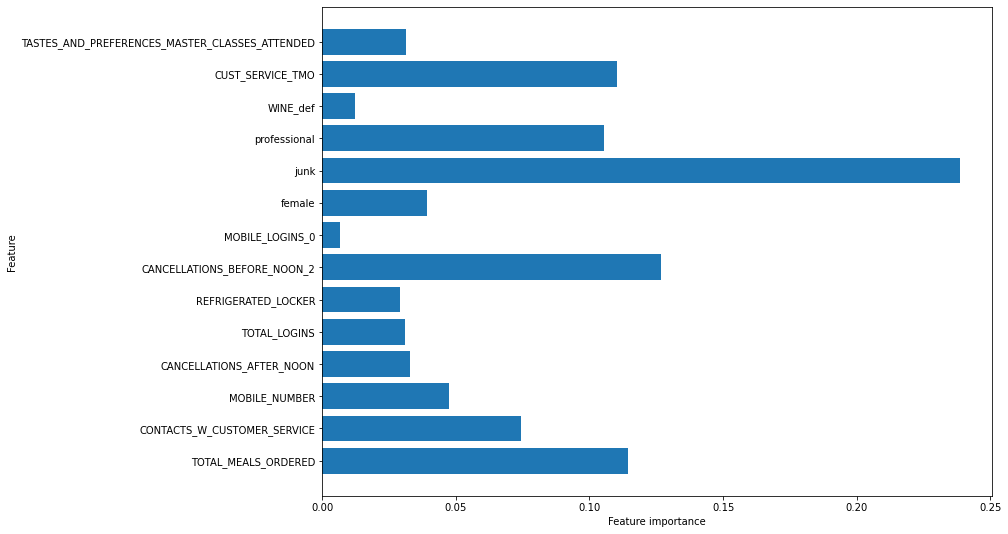

In [69]:
# INSTANTIATING a Random Forest Classification model
forest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       n_estimators=900, warm_start=True, random_state=219)


# FITTING the training data
forest_fit = forest.fit(X, y)


# PREDICTING based on the testing set
y_pred = forest_fit.predict(X_test)


# saving scoring data
train_score = forest.score(X_train, y_train).round(4)
test_score  = forest.score(X_test, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                            y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'RandomForestClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_1',
                'Model parameters'  : forest},
            ignore_index = True)


# plotting the most important features
plot_feature_importances(forest, X_train)

## GradientBoostingClassifier()

### Cross validation

In [70]:
# declaring a hyperparameter space
#learn_space        = np.arange(0.5,2.0,0.2)
#estimator_space    = np.arange(100,200,25)
#depth_space        = np.arange(3,9,1)
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space,
#              'warm_start'    : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#estimator_tuned = GradientBoostingClassifier()


# GridSearchCV object
#tuned_cv = RandomizedSearchCV(estimator           = estimator_tuned,   # the model object
#                              param_distributions = param_grid, # parameters to tune
#                              cv                  = 3,          # how many folds in cross-validation
#                              n_iter              = 1500,        # number of combinations of hyperparameters to try
#                              random_state        = 219,        # starting point for random sequence
#                              scoring = make_scorer(
#                                        roc_auc_score,
#                                        needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_cv.fit(X, y)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_cv.best_params_)
#print("Tuned CV AUC      :", tuned_cv.best_score_.round(4))

### Applying the model

In [71]:
# best estimators based on RandomizedSearchCV
#tuned_cv.best_estimator_

Training ACCURACY: 0.9061
Testing  ACCURACY: 0.924
Train-Test gap   : -0.017900000000000027
AUC Score        : 0.895

True Negatives : 127
False Positives: 29
False Negatives: 8
True Positives : 323



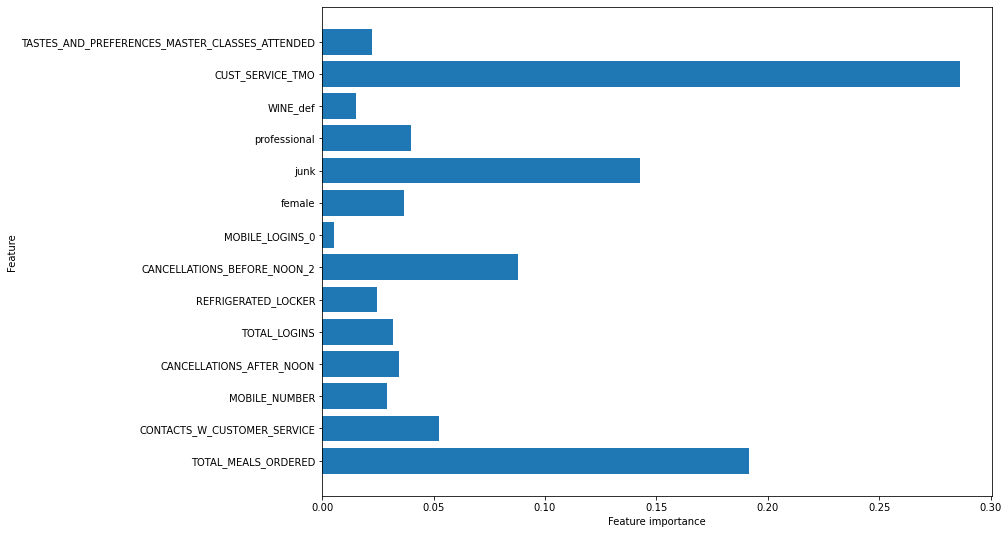

In [72]:
# INSTANTIATING the model
gradient = GradientBoostingClassifier(learning_rate=0.8999999999999999, max_depth=3,
                                      n_estimators = 100, random_state = 219, warm_start = True)


# FITTING the training data
gradient_fit = gradient.fit(X, y)


# PREDICTING based on the testing set
y_pred = gradient_fit.predict(X_test)


# saving scoring data
train_score = gradient.score(X_train, y_train).round(4)
test_score  = gradient.score(X_test, y_test).round(4)
gap         = train_score - test_score


# SCORING the results
print('Training ACCURACY:', train_score)
print('Testing  ACCURACY:', test_score)
print('Train-Test gap   :', gap)


# saving AUC score
auc_score   = roc_auc_score(y_true  = y_test,
                            y_score = y_pred).round(4)
print('AUC Score        :', auc_score)


# unpacking the confusion matrix
tn, \
fp, \
fn, \
tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives : {tp}
""")


# Saving the score
performance = performance.append(
               {'Model type'        : 'GradientBoostingClassifier',
                'Train score'       : train_score,
                'Test score'        : test_score,
                'Train-Test gap'    : gap,
                'AUC score'         : auc_score,
                'Confusion Matrix'  : (tn, fp, fn, tp),
                'Model variables'   : 'OLS_var_1',
                'Model parameters'  : gradient},
            ignore_index = True)


# Plotting important variables
plot_feature_importances(model = gradient_fit, train = X_train, export = False)

# Results summary

In [73]:
# Winning model
print("""
The best model is the Gradient Boosting Classifier on selected data (OLS_var_1)
with fine tuning, achieving an AUC of 0.895.
""")


# Sorting results
performance = performance.sort_values(by = 'AUC score',
                        ascending = False)

performance.head(n=10)

# saving the DataFrame to Excel
#performance.to_excel('./model_performance_2.7.xlsx',
#                           index = False)


The best model is the Gradient Boosting Classifier on selected data (OLS_var_1)
with fine tuning, achieving an AUC of 0.895.



,Model type,Train score,Test score,Train-Test gap,AUC score,Confusion Matrix,Model variables,Model parameters
3,GradientBoostingClassifier,1.0000,1.0000,0.0000,1.0000,"(156, 0, 0, 331)",OLS_var_2,([DecisionTreeRegressor(criterion='friedman_ms...
8,GradientBoostingClassifier,0.9061,0.9240,-0.0179,0.8950,"(127, 29, 8, 323)",OLS_var_1,([DecisionTreeRegressor(criterion='friedman_ms...
1,KNeighborsClassifier,0.7704,0.7721,-0.0017,0.7679,"(118, 38, 73, 258)",OLS_var_2 standardized,"KNeighborsClassifier(algorithm='kd_tree', leaf..."
6,KNeighborsClassifier,0.7601,0.7577,0.0024,0.7048,"(87, 69, 49, 282)",OLS_var_1 standardized,"KNeighborsClassifier(leaf_size=55, n_neighbors..."
7,RandomForestClassifier,0.7779,0.7885,-0.0106,0.6868,"(63, 93, 10, 321)",OLS_var_1,"(DecisionTreeClassifier(criterion='entropy', m..."
5,DecisionTreeClassifier,0.7423,0.7659,-0.0236,0.6770,"(67, 89, 25, 306)",OLS_var_1,"DecisionTreeClassifier(max_depth=6, min_sample..."
4,LogisticRegression,0.7265,0.7495,-0.0230,0.6463,"(56, 100, 22, 309)",OLS_var_1,"LogisticRegression(C=3.1, max_iter=3000, multi..."
2,RandomForestClassifier,0.7690,0.7680,0.0010,0.6446,"(47, 109, 4, 327)",OLS_var_2,"(DecisionTreeClassifier(max_depth=7, max_featu..."
0,DecisionTreeClassifier,0.7204,0.7146,0.0058,0.6104,"(50, 106, 33, 298)",OLS_var_2,"DecisionTreeClassifier(max_depth=7, max_leaf_n..."


In [74]:
print(f"""
The model we recommend using is a Gradient Boosting Classifier, run on the
variables in the list OLS_var_1. This model achieved the highest score of all
our tests, other than those with signs of overfitting.
It has an AUC of 0.6545, and its stability is reflected by a low Train-Test gap.
Below key features of the winning model:

Model type      : {performance.loc[8, 'Model type']}
Train-Test gap  : {performance.loc[8, 'Train-Test gap'].round(decimals=4)}
AUC score       : {performance.loc[8, 'AUC score']}
Model parameters: {performance.loc[8, 'Model parameters']}""")


The model we recommend using is a Gradient Boosting Classifier, run on the
variables in the list OLS_var_1. This model achieved the highest score of all
our tests, other than those with signs of overfitting.
It has an AUC of 0.6545, and its stability is reflected by a low Train-Test gap.
Below key features of the winning model:

Model type      : GradientBoostingClassifier
Train-Test gap  : -0.0179
AUC score       : 0.895
Model parameters: GradientBoostingClassifier(learning_rate=0.8999999999999999, random_state=219,
                           warm_start=True)
